In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime

Downloading data fom yahoo finance

In [4]:
end = datetime.now()
start = datetime(end.year -7, end.month, end.day)
stock = "XRP-USD" 
xrp_data = yf.download(stock, start, end)
xrp_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,0.217911,0.221791,0.214866,0.217488,0.217488,147916992
2017-11-10,0.218256,0.219068,0.205260,0.206483,0.206483,141032992
2017-11-11,0.205948,0.214456,0.205459,0.210430,0.210430,134503008
2017-11-12,0.210214,0.210214,0.195389,0.197339,0.197339,251175008
2017-11-13,0.197472,0.204081,0.197456,0.203442,0.203442,132567000
...,...,...,...,...,...,...
2024-03-22,0.640695,0.644345,0.600405,0.610949,0.610949,2053036282
2024-03-23,0.610948,0.632407,0.605780,0.617596,0.617596,1160450696
2024-03-24,0.617608,0.635601,0.614912,0.632950,0.632950,1230486578


To get a summary statistics of the fetched Ripple price data

In [5]:
xrp_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2330.000000,2330.000000,2330.000000,2330.000000,2330.000000,2.330000e+03
mean,0.524240,0.545066,0.501979,0.524431,0.524431,2.360868e+09
std,0.330104,0.357317,0.303446,0.330040,0.330040,3.330254e+09
min,0.140524,0.146911,0.115093,0.139635,0.139635,1.002940e+08
25%,0.304655,0.312861,0.298101,0.304787,0.304787,8.529704e+08
50%,0.448210,0.461996,0.430009,0.448453,0.448453,1.403293e+09
75%,0.627186,0.646264,0.608581,0.627172,0.627172,2.411174e+09
max,3.363570,3.841940,3.117340,3.377810,3.377810,3.695518e+10


 .info() method to get a concise summary of the Ripple price data, including the number of entries (non-null values) in each column, column data types, and memory usage

In [6]:
xrp_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2330 entries, 2017-11-09 to 2024-03-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2330 non-null   float64
 1   High       2330 non-null   float64
 2   Low        2330 non-null   float64
 3   Close      2330 non-null   float64
 4   Adj Close  2330 non-null   float64
 5   Volume     2330 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 127.4 KB


Count the number of missing (NaN) values in each column

In [7]:
xrp_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

lowercase

In [8]:
xrp_data.columns = xrp_data.columns.str.lower()

Closing price data, containing only the 'Close' price

In [9]:
closing_price = xrp_data[['close']]
closing_price

,close
Date,
2017-11-09,0.217488
2017-11-10,0.206483
2017-11-11,0.210430
2017-11-12,0.197339
2017-11-13,0.203442
...,...
2024-03-22,0.610949
2024-03-23,0.617596
2024-03-24,0.632950


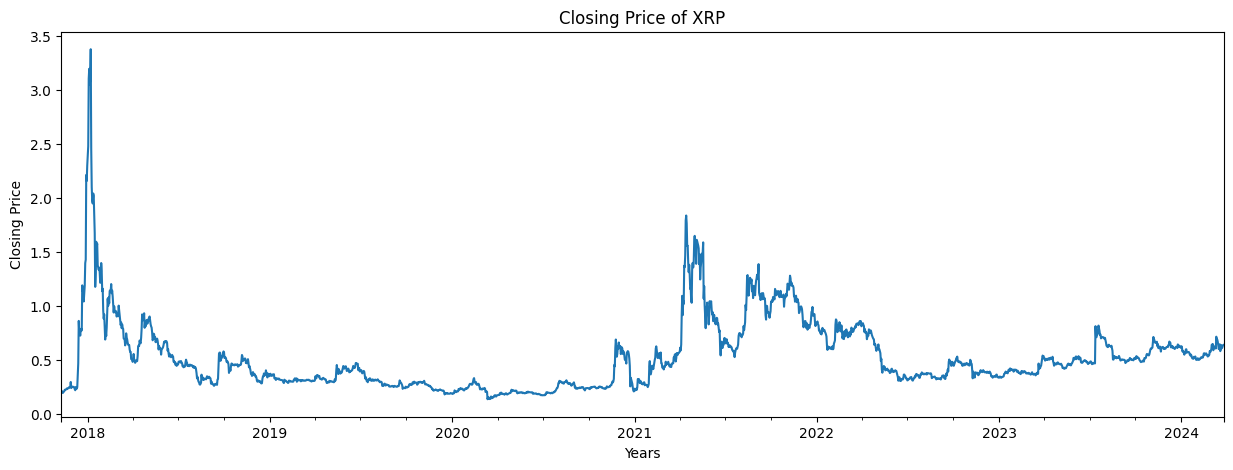

In [10]:
plt.figure(figsize=(15, 5))
closing_price['close'].plot()
plt.xlabel('Years')
plt.ylabel('Closing Price')
plt.title('Closing Price of XRP')
plt.show()


Prints the number of closing prices for each year from 2017 to 2023

In [11]:
for i in range(2017, 2024):
    print(f"Year {i}: {list(closing_price.index.year).count(i)}")

Year 2017: 53
Year 2018: 365
Year 2019: 365
Year 2020: 366
Year 2021: 365
Year 2022: 365
Year 2023: 365


Rolling average of the closing prices of Ripple (XRP) over a 365-day window and assigns the result to a new column named 'month_average_365_days' in the closing_price 

In [12]:
closing_price.loc[:, 'month_average_365_days'] = closing_price['close'].rolling(window=365).mean()
closing_price['month_average_365_days'].head()

C:\Users\aivi1\AppData\Local\Temp\ipykernel_12504\1759344284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price.loc[:, 'month_average_365_days'] = closing_price['close'].rolling(window=365).mean()


Date
2017-11-09   NaN
2017-11-10   NaN
2017-11-11   NaN
2017-11-12   NaN
2017-11-13   NaN
Name: month_average_365_days, dtype: float64

Ploting both the original closing prices of Ripple (XRP) and the 365-day rolling average of closing prices

<Figure size 640x480 with 0 Axes>

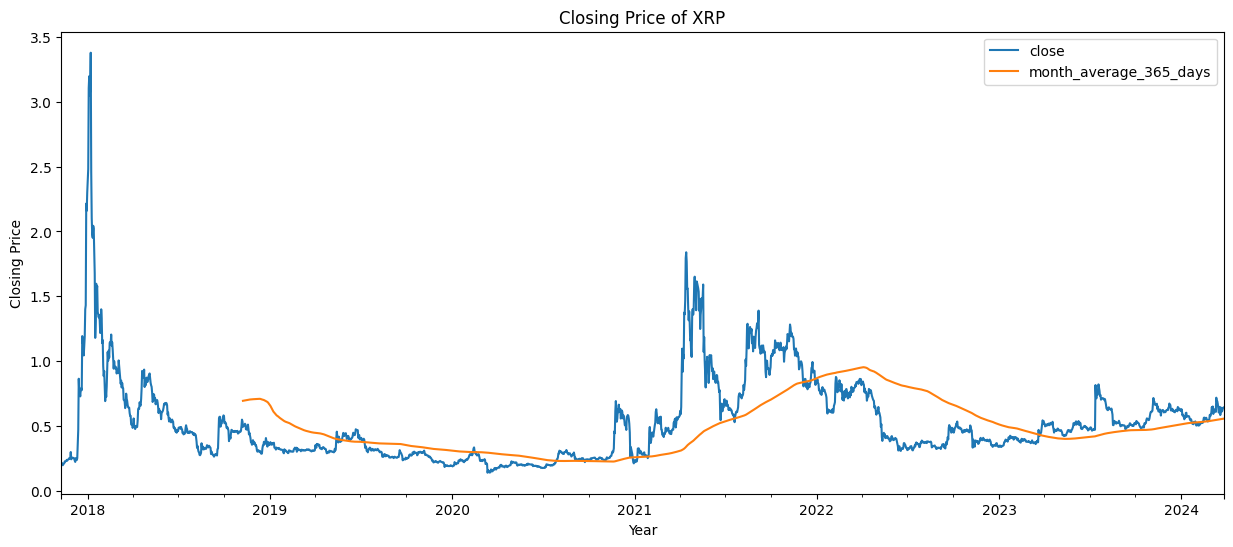

In [13]:
plt.figure()
closing_price[['close', 'month_average_365_days']].plot(figsize=(15, 6))
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.title('Closing Price of XRP')
plt.show()

Calculates a 100-day rolling average of the closing prices of Ripple (XRP) and adds it as a new column named 'month_average_100_days' in the closing_price 

C:\Users\aivi1\AppData\Local\Temp\ipykernel_12504\2273741351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price.loc[:, 'month_average_100_days'] = closing_price['close'].rolling(window=100).mean()


<Figure size 640x480 with 0 Axes>

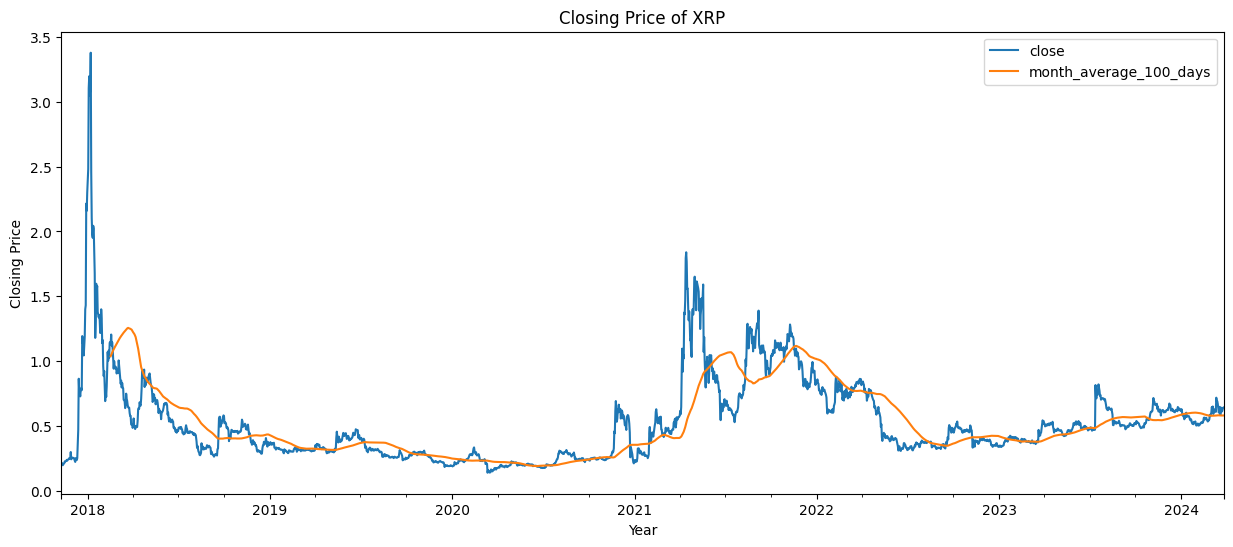

In [14]:
closing_price.loc[:, 'month_average_100_days'] = closing_price['close'].rolling(window=100).mean()

plt.figure()
closing_price[['close', 'month_average_100_days']].plot(figsize=(15, 6))
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.title('Closing Price of XRP')
plt.show()

Scale the 'close' prices of Ripple (XRP) to a range between 0 and 1

In [15]:
from sklearn.preprocessing import MinMaxScaler

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_price[['close']].values)
scaled_data

array([[0.02404225],
       [0.02064373],
       [0.02186262],
       ...,
       [0.15234353],
       [0.15484   ],
       [0.1555113 ]])

In [16]:
scaled_data.shape

(2330, 1)

Creating training data for a time series forecasting model

In [17]:
x_data = []
y_data = []
base_days = 100 

for i in range(base_days, len(scaled_data)):
    x_data.append(scaled_data[i-base_days: i])
    y_data.append(scaled_data[i])

x_data, y_data = np.array(x_data), np.array(y_data)
x_data[0], y_data[0]

(array([[0.02404225],
        [0.02064373],
        [0.02186262],
        [0.01781991],
        [0.01970462],
        [0.02167579],
        [0.02264269],
        [0.02701275],
        [0.02685031],
        [0.02748215],
        [0.02821991],
        [0.03061107],
        [0.02891629],
        [0.03064195],
        [0.03173609],
        [0.03242784],
        [0.03482147],
        [0.03371745],
        [0.03529519],
        [0.04926139],
        [0.03194052],
        [0.03435361],
        [0.03584241],
        [0.03577849],
        [0.03487242],
        [0.03518525],
        [0.0328784 ],
        [0.02869178],
        [0.02568978],
        [0.0347387 ],
        [0.03244822],
        [0.0301707 ],
        [0.03460468],
        [0.0722339 ],
        [0.10235024],
        [0.22377666],
        [0.19039922],
        [0.19115922],
        [0.18180951],
        [0.19726296],
        [0.20123126],
        [0.19650853],
        [0.32531443],
        [0.30839749],
        [0.31953338],
        [0

 The input-output pairs into training and testing sets for training and evaluating the time series forecasting model. It divides the data such that 90% is used for training (x_train and y_train), and the remaining 10% is used for testing (x_test and y_test).

In [18]:
len_train = int(len(x_data) * 0.9) # 90% data
x_train = x_data[:len_train]
y_train = y_data[:len_train]

x_test = x_data[len_train:]
y_test = y_data[len_train:]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2007, 100, 1)
(2007, 1)
(223, 100, 1)
(223, 1)


 Sequential model in Keras for time series forecasting using Long Short-Term Memory (LSTM) layers

In [20]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()

model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(25))
model.add(Dense(1))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

The Adam optimizer is commonly used for training deep learning models, and mean squared error is a standard loss function for regression tasks

In [21]:
model.compile(optimizer='adam', loss='mean_squared_error')

Model to the training data (x_train and y_train) using a batch size of 5 and training for 10 epochs

In [22]:
model.fit(x_train, y_train, batch_size = 5, epochs = 10)

Epoch 1/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - loss: 0.0012
Epoch 2/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - loss: 4.4954e-04
Epoch 3/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - loss: 2.9495e-04
Epoch 4/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - loss: 2.4223e-04
Epoch 5/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 2.1404e-04
Epoch 6/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 1.7870e-04
Epoch 7/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 2.4809e-04
Epoch 8/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 1.9761e-04
Epoch 9/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 1.4906e-04
Epoch 10/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 2.9657e-04


Predictions using the trained model on the test data x_test

In [23]:
predictions = model.predict(x_test)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


array([[0.14640707],
       [0.12321021],
       [0.11934674],
       [0.12339593],
       [0.13000472],
       [0.12702765],
       [0.12530237],
       [0.12752864],
       [0.12483164],
       [0.12644044],
       [0.12603201],
       [0.12600528],
       [0.12582633],
       [0.13039382],
       [0.12790401],
       [0.1225182 ],
       [0.11814806],
       [0.11787581],
       [0.11968258],
       [0.12098417],
       [0.12035757],
       [0.11959812],
       [0.11991616],
       [0.11999772],
       [0.11973213],
       [0.11802633],
       [0.1113321 ],
       [0.11196078],
       [0.11318199],
       [0.11500135],
       [0.1184214 ],
       [0.11867233],
       [0.11668892],
       [0.11906586],
       [0.12253063],
       [0.12501691],
       [0.12139729],
       [0.12208316],
       [0.1210679 ],
       [0.11933449],
       [0.11991327],
       [0.11906575],
       [0.11834271],
       [0.12097487],
       [0.12481637],
       [0.12365968],
       [0.12570083],
       [0.122

This will convert the scaled predictions back to the original scale of the closing prices

In [24]:
inverse_predictions = scaler.inverse_transform(predictions)
inverse_predictions

array([[0.61372674],
       [0.53861123],
       [0.52610064],
       [0.5392126 ],
       [0.56061304],
       [0.55097276],
       [0.545386  ],
       [0.5525951 ],
       [0.5438617 ],
       [0.54907125],
       [0.54774874],
       [0.54766214],
       [0.54708266],
       [0.561873  ],
       [0.5538106 ],
       [0.5363704 ],
       [0.5222191 ],
       [0.5213375 ],
       [0.5271882 ],
       [0.53140295],
       [0.5293738 ],
       [0.52691466],
       [0.5279445 ],
       [0.5282086 ],
       [0.5273486 ],
       [0.52182496],
       [0.5001479 ],
       [0.50218356],
       [0.5061381 ],
       [0.5120295 ],
       [0.5231042 ],
       [0.5239168 ],
       [0.51749414],
       [0.52519107],
       [0.5364106 ],
       [0.54446167],
       [0.53274065],
       [0.53496164],
       [0.531674  ],
       [0.526061  ],
       [0.52793515],
       [0.5251908 ],
       [0.52284944],
       [0.5313728 ],
       [0.5438122 ],
       [0.54006666],
       [0.5466763 ],
       [0.537

Display the first five elements of both the inverse-transformed predictions (inverse_predictions) and the inverse-transformed test target values (inverse_y_test)

In [25]:
inverse_y_test = scaler.inverse_transform(y_test)
inverse_predictions, inverse_y_test

(array([[0.61372674],
        [0.53861123],
        [0.52610064],
        [0.5392126 ],
        [0.56061304],
        [0.55097276],
        [0.545386  ],
        [0.5525951 ],
        [0.5438617 ],
        [0.54907125],
        [0.54774874],
        [0.54766214],
        [0.54708266],
        [0.561873  ],
        [0.5538106 ],
        [0.5363704 ],
        [0.5222191 ],
        [0.5213375 ],
        [0.5271882 ],
        [0.53140295],
        [0.5293738 ],
        [0.52691466],
        [0.5279445 ],
        [0.5282086 ],
        [0.5273486 ],
        [0.52182496],
        [0.5001479 ],
        [0.50218356],
        [0.5061381 ],
        [0.5120295 ],
        [0.5231042 ],
        [0.5239168 ],
        [0.51749414],
        [0.52519107],
        [0.5364106 ],
        [0.54446167],
        [0.53274065],
        [0.53496164],
        [0.531674  ],
        [0.526061  ],
        [0.52793515],
        [0.5251908 ],
        [0.52284944],
        [0.5313728 ],
        [0.5438122 ],
        [0

Create a DataFrame with two columns: 'original_test_data' containing the actual closing prices from the test data and 'predictions' containing the model's predictions

In [26]:
plotting_data = pd.DataFrame({
    'original_test_data': inverse_y_test.reshape(-1),
    'predictions': inverse_predictions.reshape(-1),
}, index = closing_price.index[len_train+100:])

plotting_data

,original_test_data,predictions
Date,,
2023-08-17,0.507142,0.613727
2023-08-18,0.506100,0.538611
2023-08-19,0.519629,0.526101
2023-08-20,0.539547,0.539213
2023-08-21,0.524538,0.560613
...,...,...
2024-03-22,0.610949,0.661063
2024-03-23,0.617596,0.639110
2024-03-24,0.632950,0.640421


Visualize the original test data and the model's predictions against the dates

<Figure size 640x480 with 0 Axes>

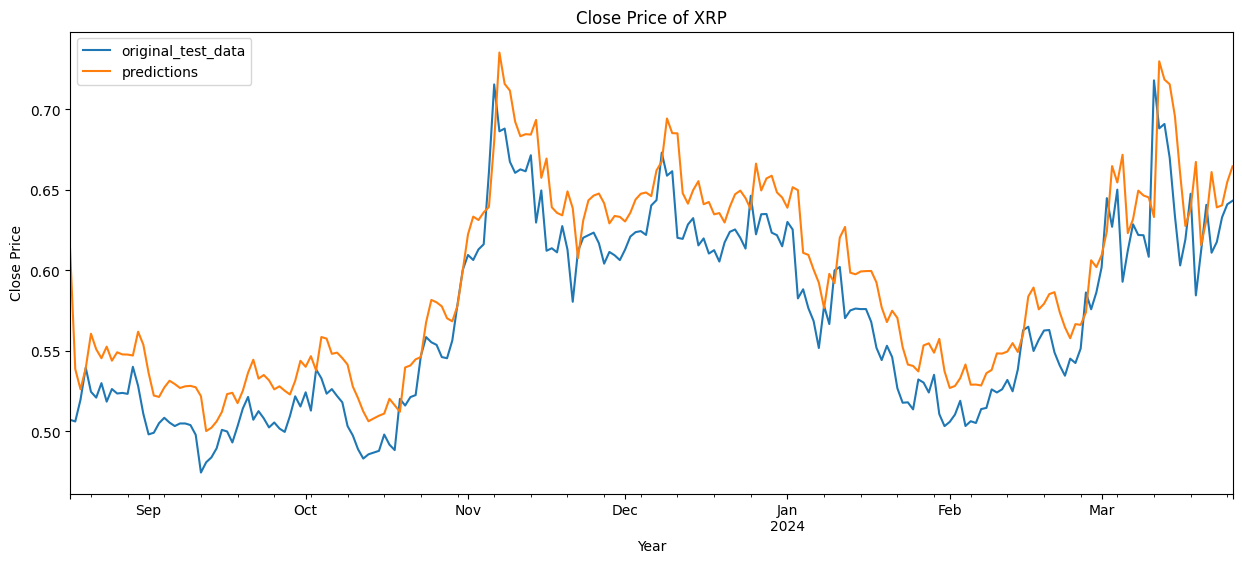

In [27]:
plt.figure()
plotting_data.plot(figsize=(15, 6))
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title('Close Price of XRP')
plt.show()

Most recent 100 'close' prices of Ripple (XRP)

In [28]:
last_100 = closing_price[['close']].tail(100)
last_100.tail()

,close
Date,
2024-03-22,0.610949
2024-03-23,0.617596
2024-03-24,0.632950
2024-03-25,0.641034
2024-03-26,0.643208


Transforms the last 100 'close' prices using the fit_transform method of the scaler. The reshape(-1, 1) operation ensures that the input data is reshaped to a 2D array with a single feature. After scaling, the data is reshaped again to match the input shape required by the LSTM model, which is (batch_size, timesteps, features). The resulting array last_100 has the shape (1, 100, 1), representing a single batch with 100 timesteps and a single feature. This format is suitable for making predictions using the LSTM model

In [29]:
last_100 = scaler.fit_transform(last_100['close'].values.reshape(-1,1)).reshape(1, -1, 1)
last_100

array([[[5.08915743e-01],
        [4.75989377e-01],
        [5.31206417e-01],
        [5.61884739e-01],
        [5.68829178e-01],
        [5.44639471e-01],
        [5.13514481e-01],
        [6.66272434e-01],
        [5.54711973e-01],
        [6.12833465e-01],
        [6.13494589e-01],
        [5.59520173e-01],
        [5.52268338e-01],
        [5.20137929e-01],
        [5.90612704e-01],
        [5.68647736e-01],
        [3.69511498e-01],
        [3.95791389e-01],
        [3.41146694e-01],
        [3.04031359e-01],
        [2.25969609e-01],
        [3.47835339e-01],
        [2.95285267e-01],
        [4.50542896e-01],
        [4.60345455e-01],
        [3.12349093e-01],
        [3.34593159e-01],
        [3.39969266e-01],
        [3.38512185e-01],
        [3.38637862e-01],
        [3.01522527e-01],
        [2.26742262e-01],
        [1.91130062e-01],
        [2.32416055e-01],
        [1.99764348e-01],
        [1.09489142e-01],
        [6.76957231e-02],
        [6.88642731e-02],
        [4.8

In [30]:
last_100.shape

(1, 100, 1)

Trained LSTM model to predict the closing price for day 101 based on the last 100 days of data

In [31]:
day101 = model.predict(last_100)
day101

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


array([[0.6482678]], dtype=float32)

Predicted closing price for day 101

In [34]:
scaler.inverse_transform(day101)

array([[0.6424688]], dtype=float32)

That predicts future closing prices for a specified number of days using an LSTM model

In [49]:
def predict_future(no_of_days, previous_100):
    future_predictions = []

    for i in range(no_of_days):
        next_day = model.predict(np.array(previous_100)).tolist()
        previous_100[0].append(next_day[0])
        previous_100 = [previous_100[0][1:]]
        future_predictions.append(scaler.inverse_transform(next_day))
    return future_predictions

no_of_days = 5

future_results = predict_future(no_of_days, last_100)
print(future_results)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[array([[0.6424688]]), array([[0.64089927]]), array([[0.63889279]]), array([[0.63676063]]), array([[0.63465724]])]


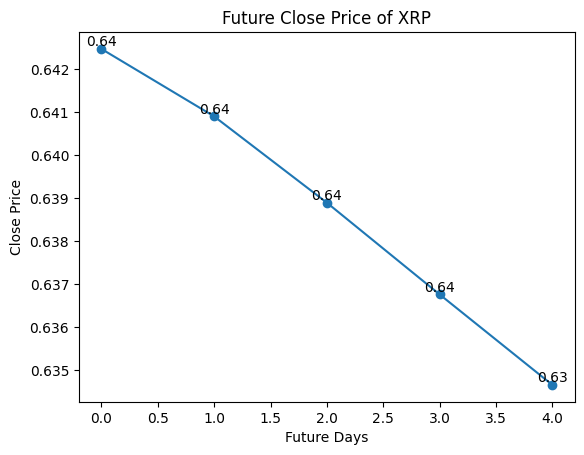

In [63]:
future_results = np.array(future_results).reshape(-1, 1)
plt.figure()
plt.plot(future_results, marker='o')
for i in range(len(future_results)):
    price = future_results[i][0]  # Extract scalar value from the array
    plt.text(i, price, str(round(float(price), 2)), ha='center', va='bottom')
plt.xlabel('Future Days')
plt.ylabel('Close Price')
plt.title('Future Close Price of XRP')
plt.show()

In [64]:
model.save('xrp_price_model.keras')